In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
data = pd.read_csv("/content/letters.csv")

In [3]:
data.shape

(42000, 46)

In [4]:
#Visualizing the data
data.head(5)

,label,pixel43,pixel44,pixel92,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,...,pixel329,pixel351,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417
0,1,0,0,0,0,0,0,0,0,0,...,0,254,0,0,0,0,0,0,0,0
1,0,0,0,0,137,137,192,86,72,1,...,254,0,0,75,254,254,254,17,0,0
2,1,0,0,0,3,141,139,3,0,0,...,0,184,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,94,255,69,0,0,0,0,0
4,0,0,0,0,155,254,254,254,157,30,...,253,0,0,0,223,253,253,253,129,0


In [5]:
# Checking for missing values

data.sum().isnull()

label       False
pixel43     False
pixel44     False
pixel92     False
pixel124    False
pixel125    False
pixel126    False
pixel127    False
pixel128    False
pixel129    False
pixel130    False
pixel131    False
pixel132    False
pixel133    False
pixel134    False
pixel135    False
pixel136    False
pixel137    False
pixel138    False
pixel146    False
pixel147    False
pixel148    False
pixel149    False
pixel150    False
pixel151    False
pixel152    False
pixel153    False
pixel154    False
pixel155    False
pixel156    False
pixel157    False
pixel158    False
pixel159    False
pixel160    False
pixel327    False
pixel328    False
pixel329    False
pixel351    False
pixel410    False
pixel411    False
pixel412    False
pixel413    False
pixel414    False
pixel415    False
pixel416    False
pixel417    False
dtype: bool

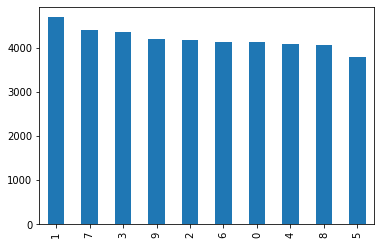

In [6]:
pd.value_counts(data['label']).plot.bar()

In [7]:
# Sepparting the features and the target variable

X = data.drop(columns=['label'])
y = data[['label']]

In [8]:
# Splitting the data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [9]:
# Performing normalization on the data
unscaled_features = X_train
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_array = sc.fit_transform(X_train.values)


In [10]:
# Assign the scaled data to a DataFrame & use the index and columns arguments to keep your original indices and column names:
X_train = pd.DataFrame(x_train_array, index=X_train.index, columns=X_train.columns)
X_test_array = sc.transform(X_test.values)
X_test = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)

In [11]:
print(X_train)

        pixel43  pixel44   pixel92  pixel124  pixel125  pixel126  pixel127  \
21377 -0.031027 -0.03219 -0.079413 -0.398333 -0.459055 -0.504832 -0.525715   
21770 -0.031027 -0.03219 -0.079413 -0.398333 -0.459055 -0.504832 -0.525715   
11776 -0.031027 -0.03219 -0.079413 -0.398333 -0.459055 -0.504832 -0.525715   
35751 -0.031027 -0.03219 -0.079413 -0.398333 -0.459055 -0.504832 -0.525715   
3201  -0.031027 -0.03219 -0.079413 -0.398333 -0.459055 -0.504832 -0.525715   
...         ...      ...       ...       ...       ...       ...       ...   
4135  -0.031027 -0.03219 -0.079413  2.004610  0.633945 -0.504832 -0.525715   
12198 -0.031027 -0.03219 -0.079413 -0.398333 -0.459055 -0.504832 -0.525715   
23194 -0.031027 -0.03219 -0.079413 -0.398333 -0.459055 -0.504832 -0.525715   
40254 -0.031027 -0.03219 -0.079413 -0.398333 -0.459055 -0.504832 -0.525715   
11350 -0.031027 -0.03219 -0.079413 -0.398333 -0.459055 -0.504832 -0.525715   

       pixel128  pixel129  pixel130  ...  pixel329  pixel351  p

# **---------- KNN ----------**

In [12]:
# Implementing KNN

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
print(classifier.fit(X_train, y_train))

KNeighborsClassifier(n_neighbors=7)


In [13]:
# Getting the results of the model

y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test set accuracy:  0.6480952380952381
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1242
           1       0.75      0.95      0.84      1396
           2       0.64      0.60      0.62      1258
           3       0.55      0.53      0.54      1299
           4       0.67      0.53      0.59      1235
           5       0.62      0.57      0.60      1115
           6       0.86      0.87      0.86      1290
           7       0.47      0.60      0.53      1315
           8       0.63      0.48      0.55      1232
           9       0.46      0.39      0.42      1218

    accuracy                           0.65     12600
   macro avg       0.64      0.64      0.64     12600
weighted avg       0.64      0.65      0.64     12600



# **---------- Neural Network---------**

In [14]:
# Implementing NN

from sklearn.neural_network import MLPClassifier
# Initializing the multilayer perceptron
mlp = MLPClassifier(hidden_layer_sizes=(120,),solver='adam',learning_rate_init= 0.001, max_iter=15000)
mlp.fit(X_train, y_train)
mlp.score(X_test,y_test)

0.6866666666666666

In [15]:
# Getting the test results
y_pred = mlp.predict(X_test)
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Test set accuracy:  0.6866666666666666
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1242
           1       0.87      0.93      0.90      1396
           2       0.68      0.64      0.66      1258
           3       0.62      0.55      0.58      1299
           4       0.79      0.57      0.66      1235
           5       0.60      0.68      0.64      1115
           6       0.88      0.88      0.88      1290
           7       0.51      0.68      0.58      1315
           8       0.61      0.58      0.60      1232
           9       0.48      0.46      0.47      1218

    accuracy                           0.69     12600
   macro avg       0.69      0.68      0.68     12600
weighted avg       0.69      0.69      0.69     12600

